<a href="https://colab.research.google.com/github/LokeshM01/Vision-Verse/blob/main/VV_assign_2_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1:

Sampling

Sampling Function:


Write a Python function that performs image sampling.
It should take an input image and a sampling factor as parameters.
The function should downsample the image according to the given factor (e.g., 2x, 4x).
Use appropriate sampling methods like nearest neighbor or bilinear interpolation.



Demonstration:


Apply your sampling function to a provided image with different sampling factors (e.g., 2x, 4x).
Display the original image and the downsampled images using Matplotlib or any appropriate library for visualization.


In [ ]:
from skimage import data
from skimage.io import imshow, imread
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


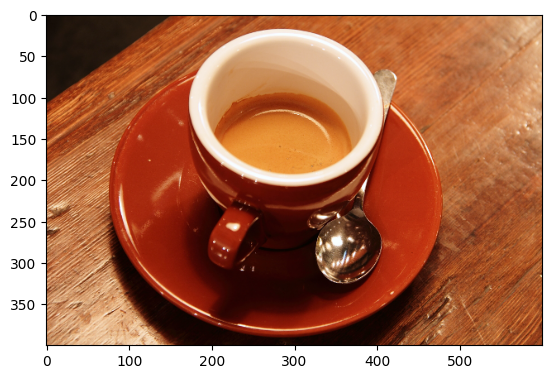

In [ ]:
coffee = data.coffee()
plt.imshow(coffee)
plt.show()

In [ ]:
#resizing by factor 2 by bilinear interpolation

In [ ]:
def resizeLayer(old) :
    rows, cols = old.shape

    rNew = 2*rows - 1
    cNew = 2*cols - 1
    new = np.zeros((rNew, cNew))

    # move old points
    new[0:rNew:2, 0:cNew:2] = old[0:rows, 0:cols]
    # produce vertical values
    new[1:rNew:2, :] = (new[0:rNew-1:2, :] + new[2:rNew:2, :]) / 2
    # produce horizontal values
    new[:, 1:cNew:2] = (new[:, 0:cNew-1:2] + new[:, 2:cNew:2]) / 2
    # produce center values
    new[1:rNew:2, 1:cNew:2] = (new[0:rNew-2:2, 0:cNew-2:2] +
                               new[0:rNew-2:2, 2:cNew:2] +
                               new[2:rNew:2, 0:cNew-2:2] +
                               new[2:rNew:2, 2:cNew:2] ) / 4

    return new

In [ ]:
def resizeImage(image):
    old = image

    new = np.zeros((2 * old.shape[0] - 1, 2 * old.shape[1] - 1, old.shape[2]))
    print("Original dimensions:", old.shape)

    for layer in range(old.shape[2]):
        new[:, :, layer] = resizeLayer(old[:, :, layer])

    # Convert the values to unsigned 8-bit integers
    new = new.astype(np.uint8)
    print("New dimensions:", new.shape)
    return new

In [ ]:

resized_coffee=resizeImage(coffee)

Original dimensions: (400, 600, 3)
New dimensions: (799, 1199, 3)


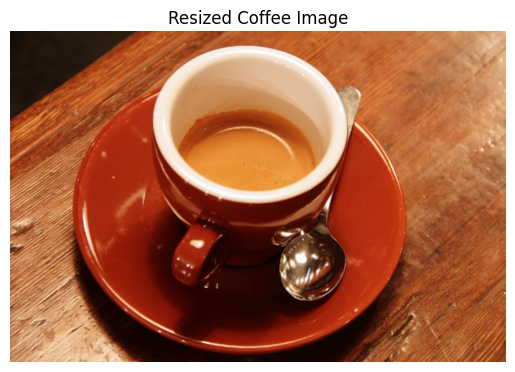

In [ ]:
plt.imshow(resized_coffee)
plt.axis('off')
plt.title('Resized Coffee Image')
plt.show()

In [ ]:
coffee.shape

(400, 600, 3)

In [ ]:
resized_coffee.shape

(799, 1199, 3)